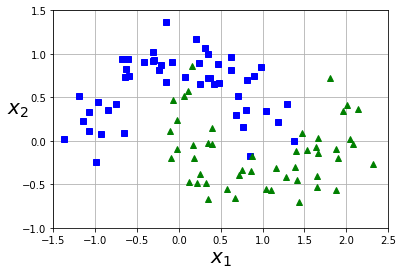

In [1]:
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# SVM with C=100
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=100, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/kimginam/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

Text(0.5, 1.0, 'C=100')

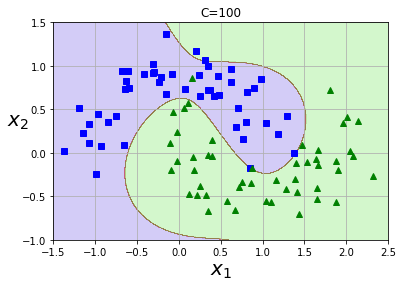

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]    
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title('C=100')

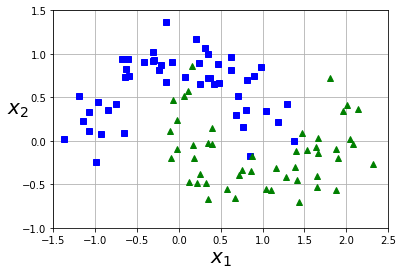

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Text(0.5, 1.0, 'Gamma=1')

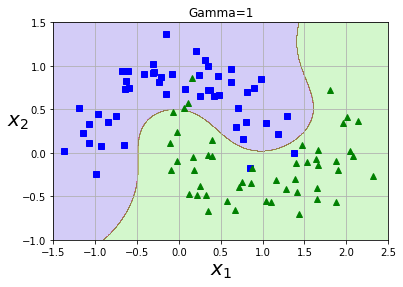

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=1))
    ])
rbf_kernel_svm_clf.fit(X, y)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title('Gamma=1')

Text(0, 0.5, '$y$')

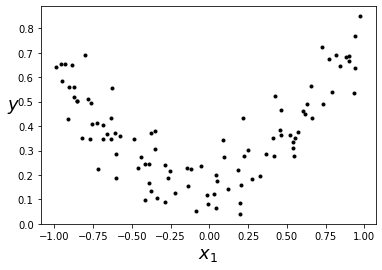

In [33]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

Text(0.5, 1.0, 'C=0.01')

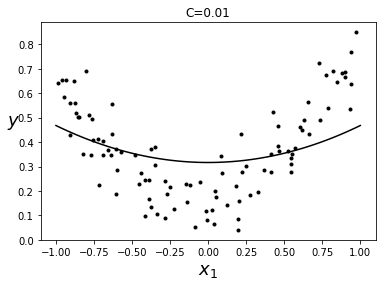

In [47]:
from sklearn.svm import SVR

model = SVR(kernel='poly', degree=2, C=0.00125, epsilon=0.1)
model.fit(X, y.ravel())
X_new = np.linspace(-1,1, 100).reshape(-1,1)
y_pred = model.predict(X_new)

plt.plot(X, y, 'k.')
plt.plot(X_new, y_pred, 'k')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('C=0.01')